Before using a data file for modeling purposes, it is important to
collect some information about its content. The objective of this lab is to extract some descriptive statistics from a database with choice data using the package `pandas`.

We introduce some examples using the file `lpmc05.dat`. 

We first import `pandas`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading and preparing the data

The
description of the columns of the file is
available [here](https://transp-or.epfl.ch/documents/technicalReports/CS_LPMC.pdf).

In [2]:
data_file = './lpmc05.dat'
df = pd.read_csv(data_file, sep='\t')
df

,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,...,dur_pt_access,dur_pt_rail,dur_pt_bus,dur_pt_int,pt_interchanges,dur_driving,cost_transit,cost_driving_fuel,cost_driving_ccharge,driving_traffic_percent
0,2,0,0,2,4,3,1,1,1.0,1,...,0.203056,0.0,0.210278,0.0,0,0.236667,1.5,0.79,0.0,0.203052
1,4,0,1,2,4,3,1,4,1.0,1,...,0.203056,0.0,0.189444,0.0,0,0.229167,1.5,0.78,0.0,0.130909
2,7,0,2,1,4,3,1,3,0.0,1,...,0.109444,0.0,0.055556,0.0,0,0.059444,0.0,0.15,0.0,0.112150
3,73,14,0,2,4,3,1,5,0.0,1,...,0.077778,0.0,0.036389,0.0,0,0.061389,0.0,0.16,0.0,0.221719
4,76,15,0,0,1,3,6,1,1.0,1,...,0.188611,0.0,0.074722,0.0,0,0.142778,1.5,0.33,0.0,0.342412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,81023,17599,0,1,3,5,6,1,1.0,3,...,0.147222,0.0,0.496111,0.0,0,0.351111,1.5,1.27,0.0,0.139241
4996,81029,17600,1,4,1,3,6,1,1.0,3,...,0.100000,0.0,0.025833,0.0,0,0.171389,1.5,0.39,0.0,0.207455
4997,81050,17605,1,0,4,1,1,5,0.0,3,...,0.133056,0.1,0.000000,0.0,0,0.265556,0.0,0.60,0.0,0.259414
4998,81074,17610,1,1,4,3,2,1,1.0,3,...,0.205833,0.0,0.391667,0.0,0,0.281667,1.5,0.86,0.0,0.368836


- The database contains 5000 rows of data, corresponding to each
observation in the sample.
- It contains 32 columns, corresponding to
the available variables.

The list of columns is reported below.

In [3]:
df.columns

Index(['trip_id', 'household_id', 'person_n', 'trip_n', 'travel_mode',
       'purpose', 'fueltype', 'faretype', 'bus_scale', 'survey_year',
       'travel_year', 'travel_month', 'travel_date', 'day_of_week',
       'start_time', 'age', 'female', 'driving_license', 'car_ownership',
       'distance', 'dur_walking', 'dur_cycling', 'dur_pt_access',
       'dur_pt_rail', 'dur_pt_bus', 'dur_pt_int', 'pt_interchanges',
       'dur_driving', 'cost_transit', 'cost_driving_fuel',
       'cost_driving_ccharge', 'driving_traffic_percent'],
      dtype='object')

If we look at the column `purpose`, corresponding to the trip
purpose, it contains a total of 5 unique values, numbered from 1 to
5. 


In [4]:
df['purpose'].unique(),

(array([3, 5, 2, 4, 1]),)

In order to understand better the distribution of these values, we
can calculate the frequency of each value, here sorted by decreasing
order of frequency.

In [5]:
df['purpose'].value_counts()

3    2621
1     807
5     675
2     550
4     347
Name: purpose, dtype: int64

The histogram of this distribution is also useful.

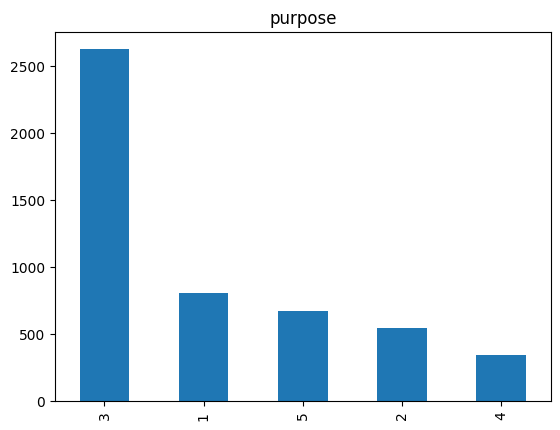

In [6]:
ax = df['purpose'].value_counts().plot(title='purpose', kind='bar')

We do the same for the `travel_mode` variable.

In [7]:
df['travel_mode'].value_counts()

4    2241
3    1723
1     852
2     184
Name: travel_mode, dtype: int64

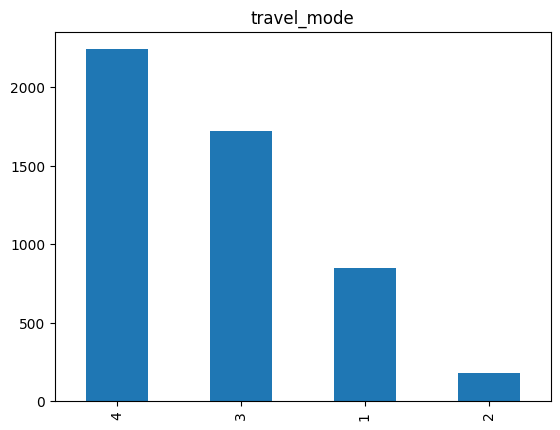

In [8]:
ax = df['travel_mode'].value_counts().plot(title='travel_mode', kind='bar')

If we look at a continuous variable, such as `dur_walking`,
representing the predicted duration of walking route in hours, we are interested in statistics
such as the mean, the standard deviation, the minimum and maximum
values, as well as some quantiles.

In [9]:
df['dur_walking'].describe()

count    5000.000000
mean        1.097102
std         1.066575
min         0.043611
25%         0.354444
50%         0.723194
75%         1.480278
max         8.707500
Name: dur_walking, dtype: float64

It is interesting to note that 75\% of the values are lesser or equal
to 1.48, while the maximum is 8.7. 

An histogram can also be plotted.

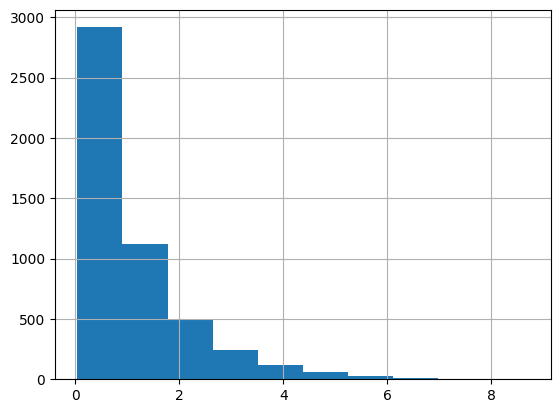

In [10]:
_ = df['dur_walking'].hist()

It may be
made more readable by using a log scale.

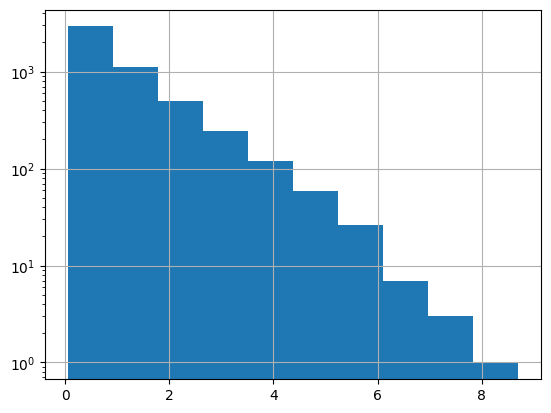

In [11]:
_ = df['dur_walking'].hist(log=True)

It is also interesting to investigate the correlation between
two variables.

In [12]:
df['dur_walking'].corr(df['distance'])

0.9964159061632911

The correlation can also be illustrated using a scatter plot.

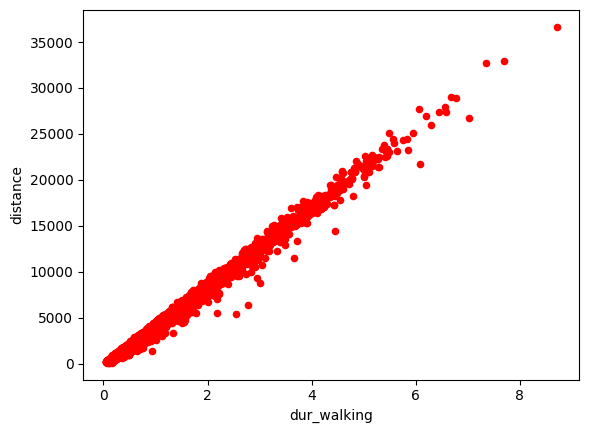

In [14]:
_ = df.plot(kind='scatter', x='dur_walking', y='distance', color='r')

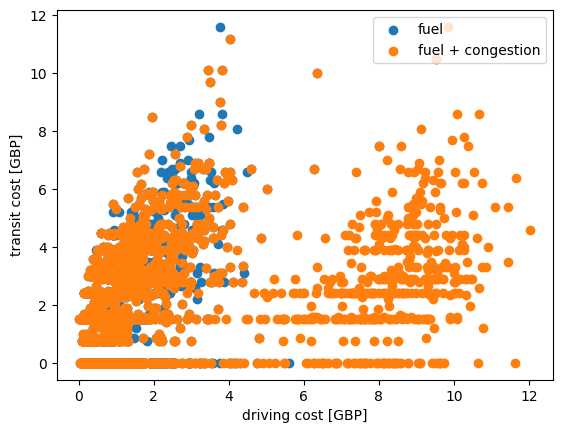

In [15]:
_ = plt.scatter(
    df.cost_driving_fuel, df.cost_transit, label='fuel')
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent,
    df.cost_transit, label='fuel + congestion')
plt.ylabel('transit cost [GBP]' )
plt.xlabel('driving cost [GBP]' )
_ = plt.legend()

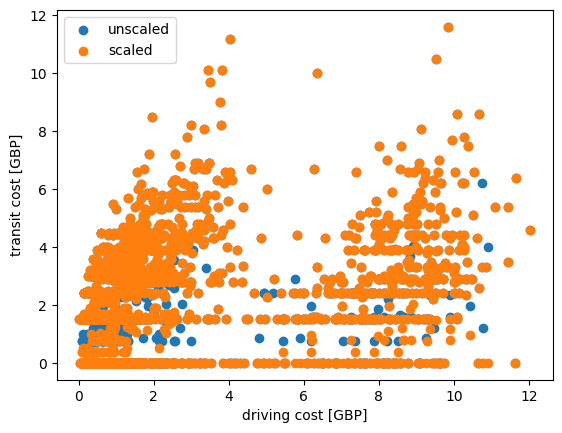

In [16]:
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent,
    df.cost_transit, label='unscaled')
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent,
    df.cost_transit*df.bus_scale, label='scaled')
plt.ylabel('transit cost [GBP]' )
plt.xlabel('driving cost [GBP]' )
_ = plt.legend()

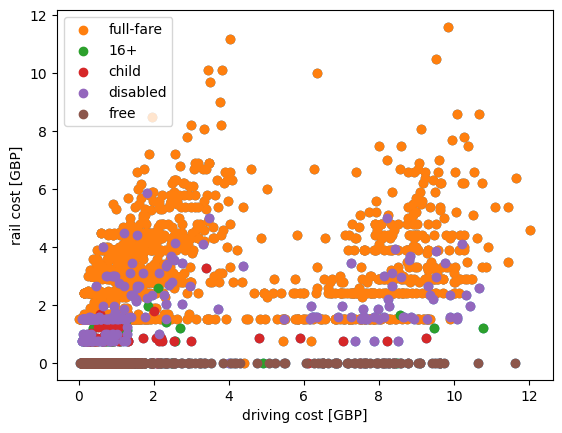

In [17]:
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent, df.cost_transit)
_ = plt.scatter(
    df[df.faretype == 1].cost_driving_fuel +
    df[df.faretype == 1].cost_driving_ccharge *
    df[df.faretype == 1].driving_traffic_percent,
    df[df.faretype == 1].cost_transit,label='full-fare')
_ = plt.scatter(df[df.faretype == 2].cost_driving_fuel +
                df[df.faretype == 2].cost_driving_ccharge *
                df[df.faretype == 2].driving_traffic_percent,
                df[df.faretype == 2].cost_transit,
                label='16+')
_ = plt.scatter(df[df.faretype == 3].cost_driving_fuel +
                df[df.faretype == 3].cost_driving_ccharge *
                df[df.faretype == 3].driving_traffic_percent,
                df[df.faretype == 3].cost_transit,
                label='child')
_ = plt.scatter(df[df.faretype == 4].cost_driving_fuel +
                df[df.faretype == 4].cost_driving_ccharge *
                df[df.faretype == 4].driving_traffic_percent,
                df[df.faretype == 4].cost_transit,
                label='disabled')
_ = plt.scatter(df[df.faretype == 5].cost_driving_fuel +
                df[df.faretype == 5].cost_driving_ccharge *
                df[df.faretype == 5].driving_traffic_percent,
                df[df.faretype == 5].cost_transit,
                label='free')
plt.ylabel('rail cost [GBP]' )
plt.xlabel('driving cost [GBP]' )
_ = plt.legend()

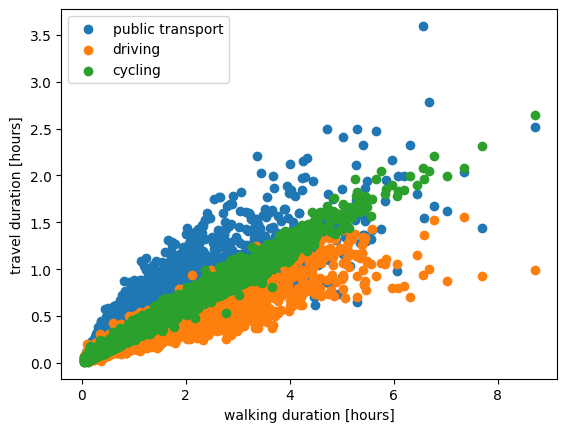

In [18]:
_ = plt.scatter(df.dur_walking,
                df.dur_pt_rail + df.dur_pt_bus + df.dur_pt_access +
                df.dur_pt_int * df.pt_interchanges,
                label='public transport')
_ = plt.scatter(df.dur_walking, df.dur_driving, label='driving')
_ = plt.scatter(df.dur_walking, df.dur_cycling, label='cycling')
plt.ylabel('travel duration [hours]')
plt.xlabel('walking duration [hours]')
_ = plt.legend()

# Model specification

We import the necessary packages and functions.

First, the interface between Biogeme and Pandas.

In [19]:
import biogeme.database as db

Then, the core of Biogeme itself.

In [20]:
import biogeme.biogeme as bio

Finally, we import some expressions that will be used to build the choice model.

In [21]:
from biogeme.expressions import Beta, Variable, log, exp, Elem

We then import the database into Biogeme.

In [22]:
database = db.Database('lpmc', df)

We identify the columns that will be used as variable in our model. 

In [55]:
travel_mode = Variable('travel_mode')
driving_license = Variable('driving_license')
fueltype = Variable('fueltype')
dur_walking = Variable('dur_walking')
dur_cycling = Variable('dur_cycling')
dur_pt_rail = Variable('dur_pt_rail')
dur_pt_bus = Variable('dur_pt_bus')
dur_pt_access = Variable('dur_pt_access')
dur_pt_int = Variable('dur_pt_int')
pt_interchanges = Variable('pt_interchanges')
dur_driving = Variable('dur_driving')
bus_scale = Variable('bus_scale')
cost_transit = Variable('cost_transit')
cost_driving_fuel = Variable('cost_driving_fuel')
cost_driving_ccharge = Variable('cost_driving_ccharge')
driving_traffic_percent = Variable('driving_traffic_percent')

We can aso define new variables from existing one.

In [56]:
dur_pt = dur_pt_rail + dur_pt_bus + dur_pt_access + dur_pt_int * pt_interchanges
dur_pt

(((dur_pt_rail + dur_pt_bus) + dur_pt_access) + (dur_pt_int * pt_interchanges))

In [57]:
cost_pt = cost_transit * bus_scale
cost_pt

(cost_transit * bus_scale)

In [58]:
cost_driving = cost_driving_fuel + cost_driving_ccharge * driving_traffic_percent
cost_driving

(cost_driving_fuel + (cost_driving_ccharge * driving_traffic_percent))

Start with a model specification that includes alternative specific constants, and cost and travel time of the different alternatives associated with generic parameters. Report both the specification (i.e., the utility functions) and the estimation results (parameter values, t-tests or p-values, null and final log likelihoods).

We are now ready to specify the choice model. We start with a simple model, that contains only generic attributes:
\begin{align*}
V_1 &= \beta_\text{time} \text{time}_1 \\
V_2 &= \text{cte}_2 + \beta_\text{time} \text{time}_2 \\
V_3 &= \text{cte}_3 + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time} \text{time}_3 \\
V_4 &= \text{cte}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time} \text{time}_4 \\
\end{align*}

We define the unknown parameter using the Biogeme expression `Beta`, that takes 5 parameters:
- the name of the parameter (it is advised to use the exact same name for the corresponding Python variable),
- the starting value for the estimation (usually, 0),
- a lower bound on the value of the coefficient, or `None` for no bound,
- an upper bound, or `None`for no bound,
- a parameter that is 1 if the value of the parameter must be fixed to its starting value, and 0 if it has to be estimated.

# Model 0, generic coefficients

In [59]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
beta_cost = Beta('beta_cost', 0, None, None, 0)
beta_time = Beta('beta_time', 0, None, None, 0)

We now write the utility functions:

In [60]:
Opt1 = (beta_time * dur_walking)
Opt2 = (constant_2 + beta_time * dur_cycling)
Opt3 = (constant_3 + beta_cost * cost_pt + beta_time * dur_pt)
Opt4 = (constant_4 + beta_cost * cost_driving + beta_time * dur_driving)

We associate each utility function with the id of the corresponding alternative. It must be consistent with the definition of the chosen alternative.

In [61]:
V = {1: Opt1, 2: Opt2, 3: Opt3, 4: Opt4}

We obtain the choice model, that is a logit model. As Biogeme requests the contribution of each observation to the log likelihood function, we calculate the log of the logit model. $$\frac{a_i e^{V_i}}{\sum_{i=1}^J a_j e^{V_j}}$$

We import a catalog of models, including the logit model.

In [62]:
from biogeme import models
from biogeme import results as res

In [63]:
logprob = models.loglogit(V, None, travel_mode)

We initialize Biogeme with this expression, and the database.

In [64]:
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'logit_lpmc_base'

The results will be stored in a dict.

In [65]:
all_results = {}

We are now ready to estimate the parameter. Biogeme tries to read a file `__logit_lpmc_base.iter` containing intermediary results from a previous estimation run. If it does not find it, it triggers a warning that can be ignored.

In [66]:
all_results['Base'] =  biogeme.estimate()

We first display some summary information:

In [67]:
print(all_results['Base'].printGeneralStatistics())

Number of estimated parameters:	5
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-4837.64
Final log likelihood:	-4837.64
Likelihood ratio test for the init. model:	-0
Rho-square for the init. model:	0
Rho-square-bar for the init. model:	-0.00103
Akaike Information Criterion:	9685.281
Bayesian Information Criterion:	9717.867
Final gradient norm:	1.8157E-02
Nbr of threads:	8



Then we display the estimation results

In [68]:
all_results['Base'].getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.217267,0.016727,-12.989313,0.000000e+00
beta_time,-4.583652,0.188989,-24.253600,0.000000e+00
constant_2,-3.407951,0.101156,-33.690105,0.000000e+00
constant_3,-0.306573,0.055020,-5.572056,2.517502e-08
constant_4,-0.956693,0.078542,-12.180602,0.000000e+00


# Model 1, alternative specific time coefficient

Using Model 0 as the base model, include alternative- specific parameters for one of the attributes of Model 0. Report both the specification and the estimation results (as defined previously).

\begin{align*}
V_1 &= \beta_\text{time,1} \text{time}_1 \\
V_2 &= \text{cte}_2 + \beta_\text{time,2} \text{time}_2 \\
V_3 &= \text{cte}_3 + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time,3} \text{time}_3 \\
V_4 &= \text{cte}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time,4} \text{time}_4 \\
\end{align*}

In [69]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
Opt1_alt_spec = (beta_time_1 * dur_walking)
Opt2_alt_spec = (constant_2 + beta_time_2 * dur_cycling)
Opt3_alt_spec = (constant_3 + beta_cost * cost_pt + beta_time_3 * dur_pt)
Opt4_alt_spec = (constant_4 + beta_cost * cost_driving +
                 beta_time_4 * dur_driving)
V_alt_spec = {
    1: Opt1_alt_spec,
    2: Opt2_alt_spec,
    3: Opt3_alt_spec,
    4: Opt4_alt_spec
}

logprob_alt_spec = models.loglogit(V_alt_spec, None, travel_mode)
biogeme_alt_spec = bio.BIOGEME(database, logprob_alt_spec)
biogeme_alt_spec.modelName = 'logit_lpmc_alt_spec'
all_results['Alt. spec.'] = biogeme_alt_spec.estimate()

In [70]:
print(all_results['Alt. spec.'].printGeneralStatistics())

Number of estimated parameters:	8
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-4375.85
Final log likelihood:	-4375.85
Likelihood ratio test for the init. model:	-0
Rho-square for the init. model:	0
Rho-square-bar for the init. model:	-0.00183
Akaike Information Criterion:	8767.7
Bayesian Information Criterion:	8819.837
Final gradient norm:	1.9343E-02
Nbr of threads:	8



In [71]:
all_results['Alt. spec.'].getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.202346,0.018846,-10.736992,0.0
beta_time_1,-8.529148,0.370724,-23.006724,0.0
beta_time_2,-5.584604,0.445793,-12.527356,0.0
beta_time_3,-3.146894,0.234270,-13.432750,0.0
beta_time_4,-6.858855,0.396436,-17.301285,0.0
constant_2,-4.548230,0.179690,-25.311552,0.0
constant_3,-2.497079,0.125927,-19.829523,0.0
constant_4,-1.853614,0.120481,-15.385168,0.0


In [72]:
all_results['Alt. spec.'].likelihood_ratio_test(all_results['Base'], 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=923.5807145558501, threshold=7.814727903251179)

# Model 2, socioeconomic interaction

Using Model 1 as the base model, include one additional alternative attribute and one interaction of a socioeconomic characteristic with either the ASCs or one of the attributes. Report both the specification and the estimation results (as defined previously).

\begin{align*}
V_1 &= \beta_\text{time,1} \text{time}_1 \\
V_2 &= \text{cte}_2 + \text{cte}_{l,2} \text{licence}_2 + \beta_\text{time,2} \text{time}_2 \\
V_3 &= \text{cte}_3 + \text{cte}_{l,3} \text{licence}_3  + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time,3} \text{time}_3  + \beta_\text{fuel,3} \text{fueltype}_3  \\
V_4 &= \text{cte}_4 + \text{cte}_{l,4} \text{licence}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time,4} \text{time}_4  + \beta_\text{fuel,4} \text{fueltype}_4  \\
\end{align*}

In [73]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_licence_2 = Beta('constant_licence_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_licence_3 = Beta('constant_licence_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
constant_licence_4 = Beta('constant_licence_4', 0, None, None, 0)
beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
beta_fuel_type_3 = Beta('beta_fuel_type_3', 0, None, None, 0)
beta_fuel_type_4 = Beta('beta_fuel_type_4', 0, None, None, 0)
Opt1_socioeco = (beta_time_1 * dur_walking)
Opt2_socioeco = (constant_2 + constant_licence_2 * driving_license +
                 beta_time_2 * dur_cycling)
Opt3_socioeco = (constant_3 + constant_licence_3 * driving_license +
                 beta_cost * cost_pt + beta_time_3 * dur_pt +
                 beta_fuel_type_3 * fueltype)
Opt4_socioeco = (constant_4 + constant_licence_4 * driving_license +
                 beta_cost * cost_driving + beta_time_4 * dur_driving +
                 beta_fuel_type_4 * fueltype)
V_socioeco = {
    1: Opt1_socioeco,
    2: Opt2_socioeco,
    3: Opt3_socioeco,
    4: Opt4_socioeco
}

logprob_socioeco = models.loglogit(V_socioeco, None, travel_mode)
biogeme_socioeco = bio.BIOGEME(database, logprob_socioeco)
biogeme_socioeco.modelName = 'logit_lpmc_socioeco'
all_results['Socioeco.'] = biogeme_socioeco.estimate()

In [74]:
print(all_results['Socioeco.'].printGeneralStatistics())

Number of estimated parameters:	13
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-3833.867
Final log likelihood:	-3833.867
Likelihood ratio test for the init. model:	1.072513e-07
Rho-square for the init. model:	1.4e-11
Rho-square-bar for the init. model:	-0.00339
Akaike Information Criterion:	7693.733
Bayesian Information Criterion:	7778.457
Final gradient norm:	2.8314E-02
Nbr of threads:	8



In [75]:
all_results['Socioeco.'].getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.169051,0.020736,-8.152740,4.440892e-16
beta_fuel_type_3,0.071290,0.021848,3.262958,1.102558e-03
beta_fuel_type_4,-0.360814,0.021738,-16.597930,0.000000e+00
beta_time_1,-8.565406,0.378249,-22.644892,0.000000e+00
beta_time_2,-5.890060,0.471991,-12.479178,0.000000e+00
beta_time_3,-3.032450,0.252594,-12.005229,0.000000e+00
beta_time_4,-7.345041,0.423679,-17.336350,0.000000e+00
constant_2,-4.972662,0.219508,-22.653671,0.000000e+00
constant_3,-2.586454,0.163045,-15.863458,0.000000e+00
constant_4,-1.334870,0.154656,-8.631204,0.000000e+00


In [76]:
all_results['Socioeco.'].likelihood_ratio_test(all_results['Alt. spec.'], 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=1083.9667044994712, threshold=11.070497693516351)

# Model 3, non-linear

Using Model 2 as the base model, include an appropriate non-linear transformation of one of the variables. Report both the specification and the estimation results (as defined previously).

We first define the Box-Cox transform of the elapsed time variables.

In [104]:
lambda_boxcox = Beta('lambda_boxcox', 1, None, None, 0)
boxcox_time_1 = models.boxcox(dur_walking, lambda_boxcox)
boxcox_time_2 = models.boxcox(dur_cycling, lambda_boxcox)
boxcox_time_3 = models.boxcox(dur_pt, lambda_boxcox)
boxcox_time_4 = models.boxcox(dur_driving, lambda_boxcox)

\begin{align*}
V_1 &= \beta_\text{time,1} \frac{\text{time}_1^{\ell}-1}{\ell} \\
V_2 &= \text{cte}_2 + \text{cte}_{l,2} \text{licence}_2 + \beta_\text{time,2} \frac{\text{time}_2^{\ell}-1}{\ell} \\
V_3 &= \text{cte}_3 + \text{cte}_{l,3} \text{licence}_3  + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time,3} \frac{\text{time}_3^{\ell}-1}{\ell}  + \beta_\text{fuel,3} \text{fueltype}_3  \\
V_4 &= \text{cte}_4 + \text{cte}_{l,4} \text{licence}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time,4} \frac{\text{time}_4^{\ell}-1}{\ell}  + \beta_\text{fuel,4} \text{fueltype}_4  \\
\end{align*}

In [114]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_licence_2 = Beta('constant_licence_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_licence_3 = Beta('constant_licence_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
constant_licence_4 = Beta('constant_licence_4', 0, None, None, 0)
beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
beta_fuel_type_3 = Beta('beta_fuel_type_3', 0, None, None, 0)
beta_fuel_type_4 = Beta('beta_fuel_type_4', 0, None, None, 0)
Opt1_nonlinear = (beta_time_1 * boxcox_time_1)
Opt2_nonlinear = (constant_2 + constant_licence_2 * driving_license +
                 beta_time_2 * boxcox_time_2)
Opt3_nonlinear = (constant_3 + constant_licence_3 * driving_license +
                 beta_cost * cost_pt + beta_time_3 * boxcox_time_3 +
                 beta_fuel_type_3 * fueltype)
Opt4_nonlinear = (constant_4 + constant_licence_4 * driving_license +
                 beta_cost * cost_driving + beta_time_4 * boxcox_time_4 +
                 beta_fuel_type_4 * fueltype)
V_nonlinear = {
    1: Opt1_nonlinear,
    2: Opt2_nonlinear,
    3: Opt3_nonlinear,
    4: Opt4_nonlinear
}

logprob_nonlinear = models.loglogit(V_nonlinear, None, travel_mode)
biogeme_nonlinear = bio.BIOGEME(database, logprob_nonlinear)
biogeme_nonlinear.modelName = 'logit_lpmc_nonlinear'
all_results['Nonlinear.'] = biogeme_nonlinear.estimate()

In [115]:
print(all_results['Nonlinear.'].printGeneralStatistics())

Number of estimated parameters:	14
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-3778.683
Final log likelihood:	-3778.646
Likelihood ratio test for the init. model:	0.07389192
Rho-square for the init. model:	9.78e-06
Rho-square-bar for the init. model:	-0.0037
Akaike Information Criterion:	7585.292
Bayesian Information Criterion:	7676.532
Final gradient norm:	1.2233E-02
Nbr of threads:	8



In [116]:
all_results['Nonlinear.'].getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.156406,0.020186,-7.748322,9.325873e-15
beta_fuel_type_3,0.074338,0.023080,3.220869,1.278027e-03
beta_fuel_type_4,-0.347746,0.022504,-15.452451,0.000000e+00
beta_time_1,-5.984910,0.279031,-21.448903,0.000000e+00
beta_time_2,-3.847988,0.307005,-12.533955,0.000000e+00
beta_time_3,-2.594174,0.197006,-13.168001,0.000000e+00
beta_time_4,-4.209801,0.341785,-12.317117,0.000000e+00
constant_2,-2.816376,0.319803,-8.806605,0.000000e+00
constant_3,2.055477,0.213172,9.642350,0.000000e+00
constant_4,-0.075700,0.281571,-0.268848,7.880465e-01


In [117]:
all_results['Nonlinear.'].likelihood_ratio_test(all_results['Socioeco.'], 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=110.44155851373307, threshold=3.841458820694124)

# Comparison of the results

In [118]:
res.compileEstimationResults(all_results)

,Base,Alt. spec.,Socioeco.,Nonlinear.
Number of estimated parameters,5,8,13,14
Sample size,5000,5000,5000,5000
Final log likelihood,-4837.640324,-4375.849966,-3833.866614,-3778.645835
Akaike Information Criterion,9685.280647,8767.699933,7693.733228,7585.29167
Bayesian Information Criterion,9717.866613,8819.837478,7778.45674,7676.532374
beta_cost,-0.217267,-0.202346,-0.169051,-0.156406
beta_time,-4.583652,,,
constant_2,-3.407951,-4.54823,-4.972662,-2.816376
constant_3,-0.306573,-2.497079,-2.586454,2.055477
constant_4,-0.956693,-1.853614,-1.33487,-0.0757
